## Pytorch Workflow

Let's explore an example Pytorch end-to-end workflow.

Resources:
* Ground truth notebook = https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook = https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question = https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.1+cu121'

## 1. Data (loading and preparing)

Data can be almost anything ... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube had lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1.  Get data into a numerical representation
2.  Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto come in!

"Visualize, visualize, visualize!'

In [6]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
  Plots training data, test data, and compares predictions.
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")


  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s= 4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

  plt.show()

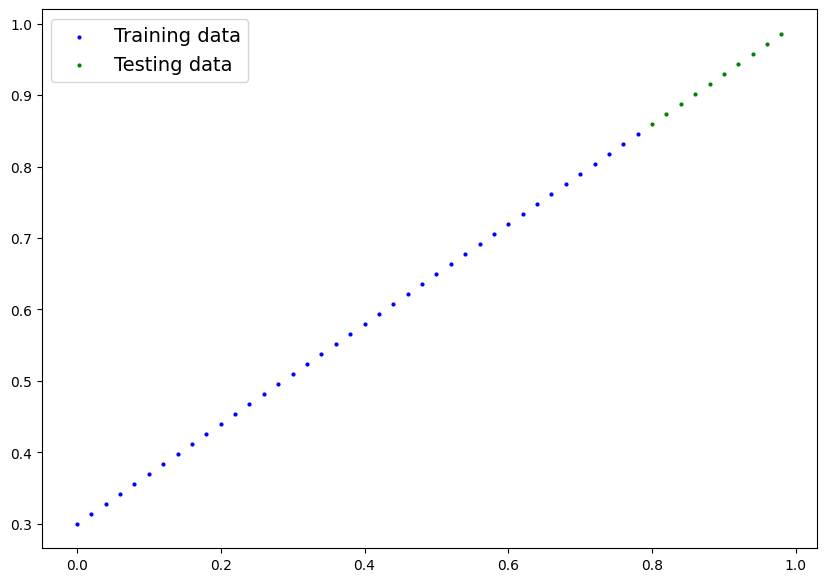

In [7]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

This is very exciting...let's do it!

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [8]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

### Pytorch model building essentials

* **torch.nn**: contains all the building blocks for computational graphs (a neural network can be considered a computational graph)
* **torch.nn.Parameter**: what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* **torch.nn.Module**: The base class for all neural network modules, if you subclass it, you should overwrite forward()
* **torch.optim**: this is where the optimizers in PyTorch live, they will help with gradient descent
* **def forward()** - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward propagation

[PyTorch Cheatsheet](https://pytorch.org/tutorials/beginner/ptcheat.html)

### Checking the contents for our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [11]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [12]:
# Make predictions with model
# Inference Mode turns off all things we don't need for test like gradient tracking and dropout layers
# Makes the predictions faster
with torch.inference_mode():
  y_preds = model_0(X_test)

# or (inference mode is better)
# with torch.no_grad():
#  y_preds = model_0(X_test)

print(f'Ground Truth: {y_test}\n\n Predictions:{y_preds}')

Ground Truth: tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

 Predictions:tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


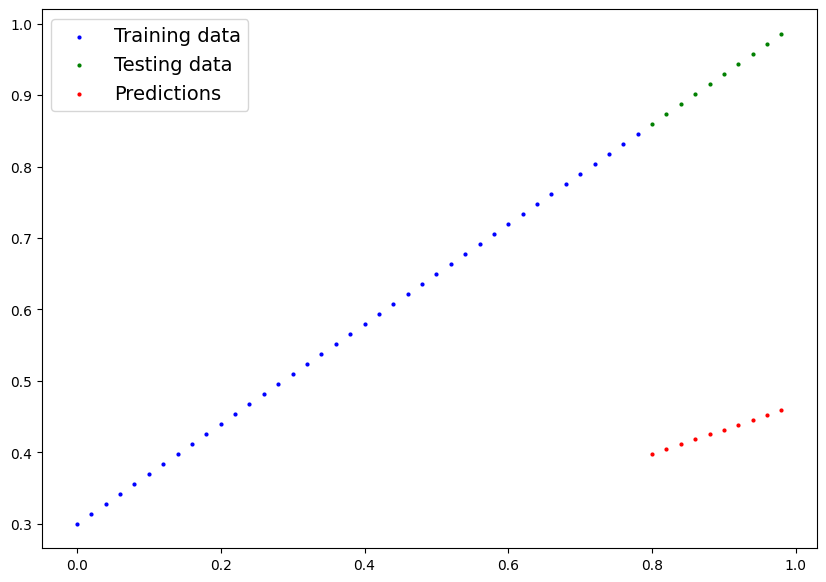

In [13]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of training is for a model to move from some *uknown* parameters (these may be random) to some *known* parameters (these are the ideal parameters).

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* *Loss Function measures the error of a single data point*
* *Cost Function measures the error of an entire dataset.*

Things we need to train:

* **Lost Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
**Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function. - https://pytorch.org/docs/stable/optim.html#module-torch.optim

  * params - the model parameters you'd like to optimize, for example params=model_0.parameters()
  * lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (A small lr results in small changes, a large lr results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop


In [14]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # lr = learning rate = possibly the most important hyperparamter you can set

In [16]:
loss_fn

L1Loss()

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involve data moving through our model's `forward()` functions) tp make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect ot the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [17]:
torch.manual_seed(42)

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# An epoch is one loop throught the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch set all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters fo the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero
                   # them above in the step 3 for the next iteration of the loop

  model_0.eval() # turns off different settings in the model not needed for evaluatio/testing (dropout/batch norm layers)

  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
  #with torch.no_grad(): you may also see torch.no_grad in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happenin
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} |  Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 |  Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 |  Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 |  Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 |  Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 |  Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 |  Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 |  Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

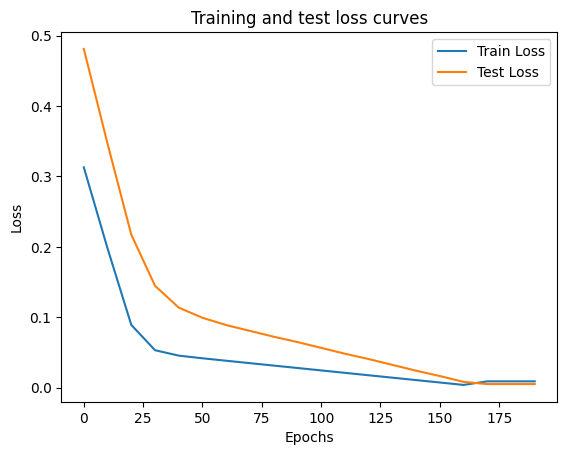

In [18]:
import numpy as np

epoch_count, loss_values, test_loss_values

numpy_loss_values = torch.tensor(loss_values).numpy()

plt.plot(epoch_count, numpy_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [19]:
#Loss: 0.016896454617381096
#OrderedDict([('weights', tensor([0.6175])), ('bias', tensor([0.3343]))])

In [20]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [22]:
weight, bias

(0.7, 0.3)

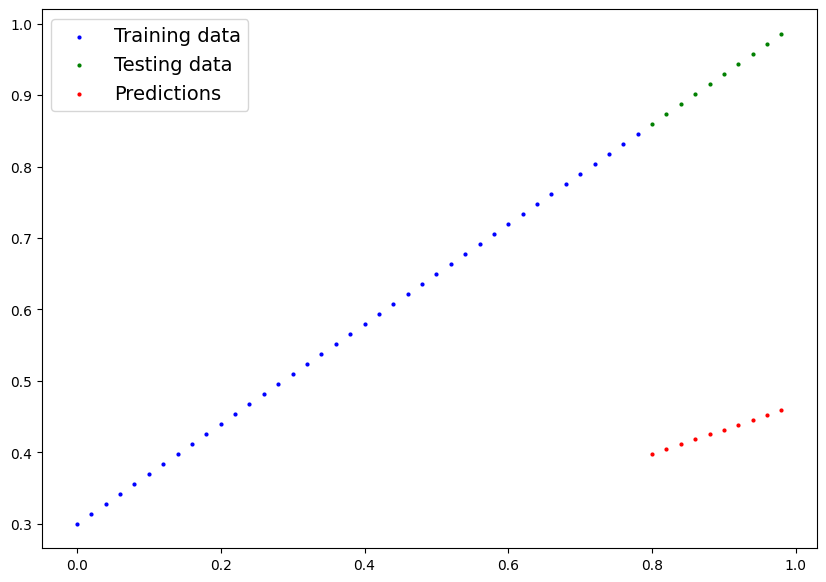

In [23]:
plot_predictions(predictions=y_preds)

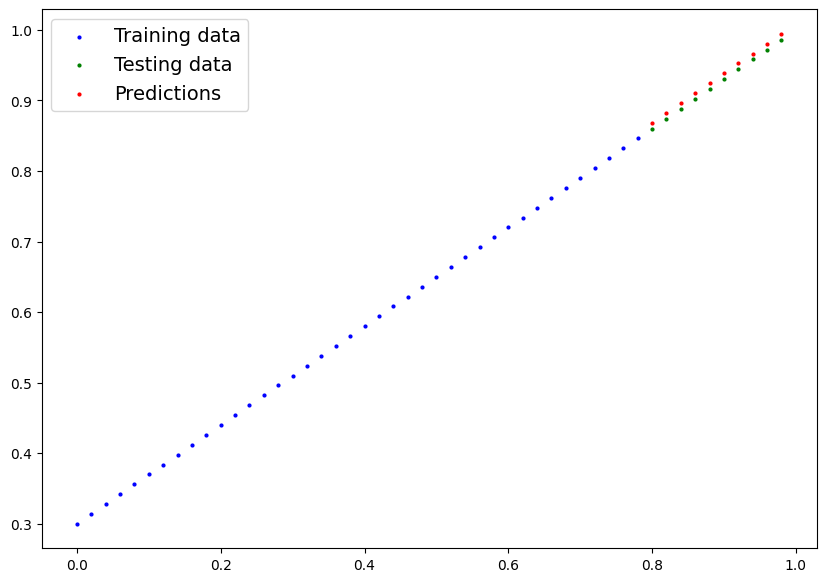

In [24]:
plot_predictions(predictions=y_preds_new)

### Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_static_dict()` - this allows you to laod a model's saved state dictionary

Read This: PyTorch Save & Load Model

https://pytorch.org/tutorials/beginner/saving_loading_models.html

### Save to Google Colab

In [25]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

# Check for the model
!ls -l models


Saving model to: models/01_pytorch_workflow_model_0.pth
total 4
-rw-r--r-- 1 root root 1680 Apr 20 03:16 01_pytorch_workflow_model_0.pth


### Save to Google Drive

In [26]:
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Create model save path
PATH = "/content/drive/MyDrive/ZTM/PyTorch/Models"
MODEL_NAME = "01_pytorch_workflow_model_0.pth"

# 3. Save the model state dict
torch.save(model_0.state_dict(), os.path.join(PATH, MODEL_NAME))

# Check for the model
!ls -l "/content/drive/MyDrive/ZTM/PyTorch/Models"

Mounted at /content/drive
total 2
-rw------- 1 root root 1680 Apr 20 03:16 01_pytorch_workflow_model_0.pth


## Loading a PyTorch Model

Since we saved our model's `state_dict()` rather than the entire mode, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [27]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.eval()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
# Make some predictions with our loaded model
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [29]:
# Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [30]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.1+cu121'

Creaet device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially fater computing).

If no GPU is available, the code will default to using CPU.

In [31]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [32]:
!nvidia-smi

Sat Apr 20 03:17:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   40C    P8              16W /  72W |      4MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 6.1 Data

In [55]:
# Create some data using the linear regression forumula of y = weight * X + bias
weight = 0.5
bias = 0.2

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X  = torch.arange(start, end, step).unsqueeze(dim=1) #without unsqueeze, deminsionality errors with pop up
y =  weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900]]))

In [56]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[: train_split], y[: train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

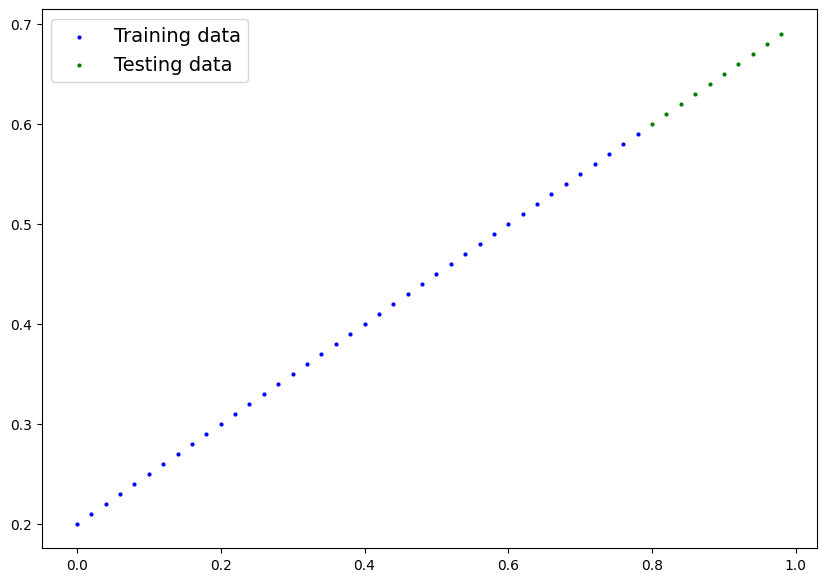

In [57]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaeded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model

In [58]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1)


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [59]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [60]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [61]:
# Setup the loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [62]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.733177900314331 | Test loss: 0.851976215839386
Epoch: 10 | Loss: 0.6179680824279785 | Test loss: 0.7172663807868958
Epoch: 20 | Loss: 0.5027582049369812 | Test loss: 0.5825566649436951
Epoch: 30 | Loss: 0.3875482976436615 | Test loss: 0.4478467106819153
Epoch: 40 | Loss: 0.2723384499549866 | Test loss: 0.31313690543174744
Epoch: 50 | Loss: 0.15712857246398926 | Test loss: 0.1784270703792572
Epoch: 60 | Loss: 0.04191867634654045 | Test loss: 0.04371720179915428
Epoch: 70 | Loss: 0.004279922228306532 | Test loss: 0.014590620994567871
Epoch: 80 | Loss: 0.004279922228306532 | Test loss: 0.014590620994567871
Epoch: 90 | Loss: 0.004279922228306532 | Test loss: 0.014590620994567871
Epoch: 100 | Loss: 0.004279922228306532 | Test loss: 0.014590620994567871
Epoch: 110 | Loss: 0.004279922228306532 | Test loss: 0.014590620994567871
Epoch: 120 | Loss: 0.004279922228306532 | Test loss: 0.014590620994567871
Epoch: 130 | Loss: 0.004279922228306532 | Test loss: 0.014590620994567871
E

In [66]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5108]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1915], device='cuda:0'))])

In [47]:
weight, bias

(0.5, 0.2)

### 6.4 Making and evaluating predictions

In [67]:
# Turn the model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  model_1_y_preds = model_1(X_test)

model_1_y_preds

tensor([[0.6001],
        [0.6104],
        [0.6206],
        [0.6308],
        [0.6410],
        [0.6512],
        [0.6614],
        [0.6717],
        [0.6819],
        [0.6921]], device='cuda:0')

In [69]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5108]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1915], device='cuda:0'))])

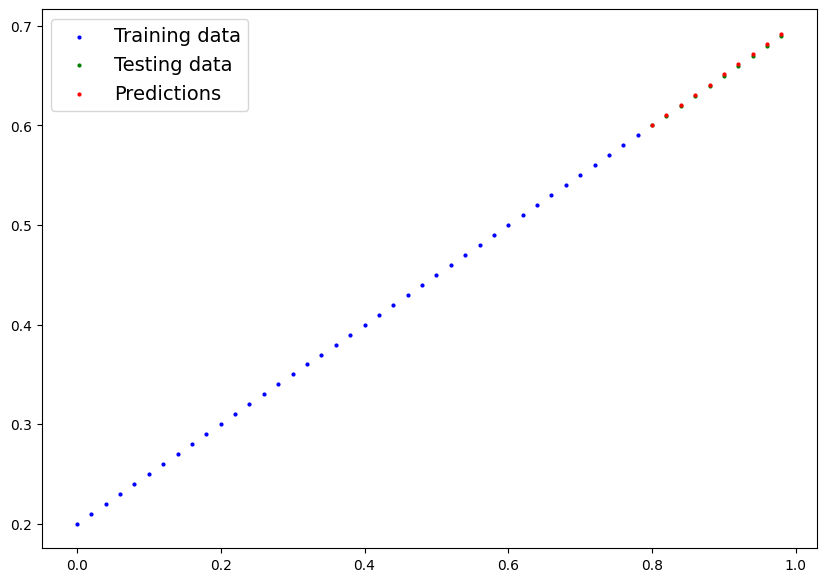

In [73]:
# Check out our model predictions visually
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(),  predictions=model_1_y_preds.cpu())

### 6.5 Saving & loading a trained model

In [74]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_mdoel_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

# Check for the model
!ls -l models


Saving model to: models/01_pytorch_workflow_mdoel_1.pth
total 8
-rw-r--r-- 1 root root 1744 Apr 20 04:36 01_pytorch_workflow_mdoel_1.pth
-rw-r--r-- 1 root root 1680 Apr 20 03:16 01_pytorch_workflow_model_0.pth


In [75]:
# Initialize model
loaded_model_1 = LinearRegressionModelV2()

# Load saved state_dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5108]])),
             ('linear_layer.bias', tensor([0.1915]))])

In [77]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]], device='cuda:0')

In [81]:
loaded_model_1.to(device)

next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [85]:
# Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

model_1_y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

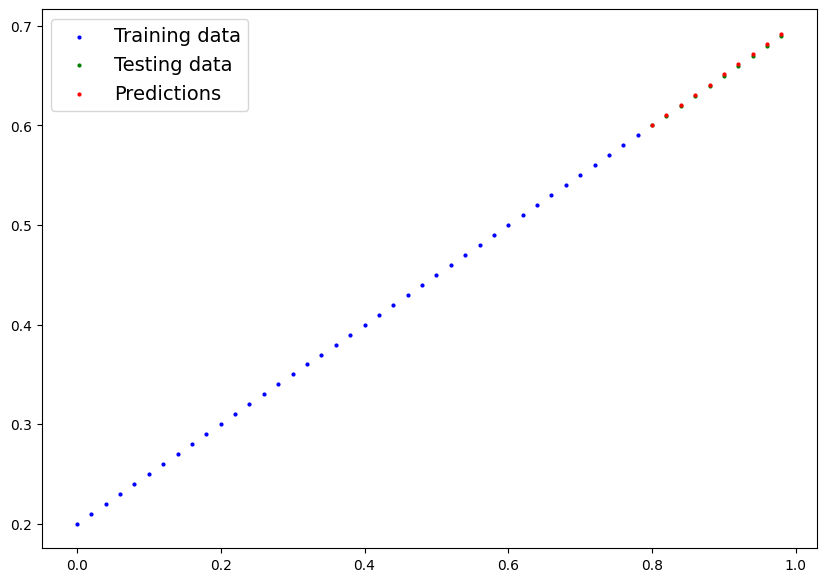

In [86]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions=loaded_model_1_preds.cpu())